(224, 224, 4)
0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
dict_keys(['image'])


RuntimeError: You are trying to use a deprecated augmentation 'IAAAdditiveGaussianNoise' which depends on the imgaug library, but imgaug is not installed.

There are two options to fix this error:
1. [Recommended]. Switch to the Albumentations' implementation of the augmentation with the same API: GaussNoise - https://albumentations.ai/docs/api_reference/augmentations/transforms/#albumentations.augmentations.transforms.GaussNoise
2. Install a version of Albumentations that contains imgaug by running 'pip install -U albumentations[imgaug]'.

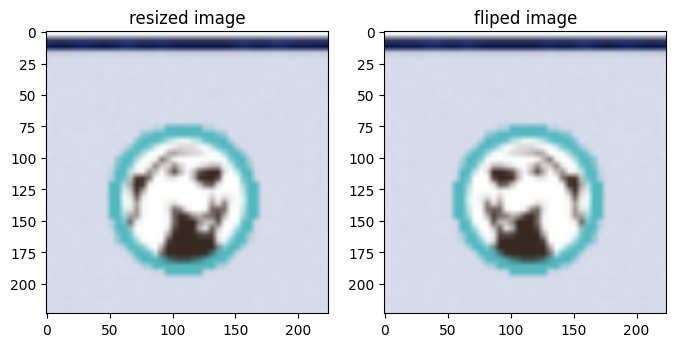

In [2]:
import albumentations  as A
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

image = Image.open('1.png')
img_arr = np.array(image)
resize = A.resize(img_arr, 224, 224)
print(resize.shape)
print('0'*100)

transform=A.Compose([
	A.Resize(height=256,width=256,p=1.)
],p=0.9)


flip = A.HorizontalFlip(p=1)  # 实例化,翻转概率为1,百分百翻转，测试使用
flipimg = flip(image=resize)
print(flipimg.keys()) # dict_keys(['image'])
plt.figure(figsize=(8,8))
plt.subplot(121)
plt.title('resized image')
plt.imshow(resize, cmap='gray')
plt.subplot(122)
plt.title('fliped image')
plt.imshow(flipimg['image'], cmap='gray')

trans =  A.Compose([
        A.HorizontalFlip(p=0.5),
        A.VerticalFlip(p=0.5),
        A.OneOf([
            A.IAAAdditiveGaussianNoise(),   # 将高斯噪声添加到输入图像
            A.GaussNoise(),    # 将高斯噪声应用于输入图像。
        ], p=0.2),   # 应用选定变换的概率
        A.OneOf([
            A.MotionBlur(p=0.2),   # 使用随机大小的内核将运动模糊应用于输入图像。
            A.MedianBlur(blur_limit=3, p=0.1),    # 中值滤波
            A.Blur(blur_limit=3, p=0.1),   # 使用随机大小的内核模糊输入图像。
        ], p=0.2),
        A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.2, rotate_limit=45, p=0.2),
        # 随机应用仿射变换：平移，缩放和旋转输入
        A.RandomBrightnessContrast(p=0.2),   # 随机明亮对比度
    ])
trans_img = trans(image=img_arr)

plt.figure(figsize=(8,8))
plt.subplot(121)
plt.title('original image')
plt.imshow(img_arr, cmap='gray')
plt.subplot(122)
plt.title('albumentions image')
plt.imshow(trans_img['image'], cmap='gray')

